In [70]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [42]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
#train_data.corr()['Survived']
train_data.info()
train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 69.7+ KB


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.066409,0.523008,0.381594,32.204208,1.538721
std,257.353842,0.486592,0.836071,0.477990,13.244532,1.102743,0.806057,49.693429,0.794231
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,26.000000,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,37.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [43]:
train_data =  train_data.drop('Name', axis = 1)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data['Sex'] =  le.fit_transform(train_data['Sex'])
train_data['Embarked'] = le.fit_transform(train_data['Embarked'])
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,2


In [64]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Ticke          0
dtype: int64

In [44]:
train_data = train_data.drop(['Cabin'],axis = 1)
train_data['Age'] = train_data.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))
train_data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,0,35.0,1,0,113803,53.1000,2
4,5,0,3,1,35.0,0,0,373450,8.0500,2
5,6,0,3,1,24.0,0,0,330877,8.4583,1
6,7,0,1,1,54.0,0,0,17463,51.8625,2
7,8,0,3,1,2.0,3,1,349909,21.0750,2
8,9,1,3,0,27.0,0,2,347742,11.1333,2
9,10,1,2,0,14.0,1,0,237736,30.0708,0


In [49]:
import re 
train_data['Ticket'] = train_data['Ticket'].str.replace(r'\D', '', regex = True)
train_data = train_data.drop(['Ticke'], axis = 1)
train_data.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1,22.0,1,0,521171,7.2500,2
1,2,1,1,0,38.0,1,0,17599,71.2833,0
2,3,1,3,0,26.0,0,0,23101282,7.9250,2
3,4,1,1,0,35.0,1,0,113803,53.1000,2
4,5,0,3,1,35.0,0,0,373450,8.0500,2


<function matplotlib.pyplot.show(close=None, block=None)>

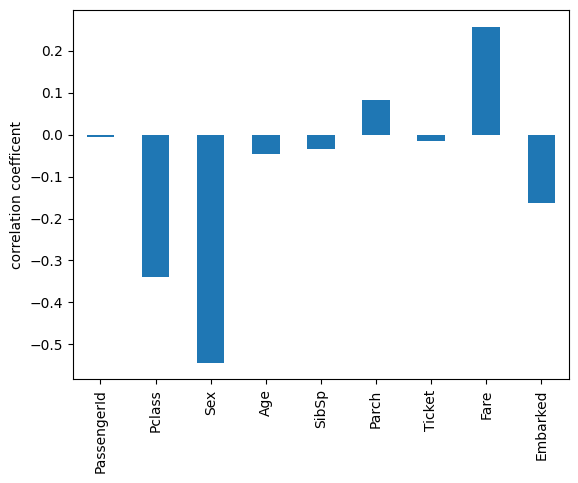

In [77]:
train_data['Ticket'] = pd.to_numeric(train_data['Ticket'])
#train_data = train_data.drop(['Ticke'], axis = 1)
train_plot = train_data.corr()['Survived'].drop(['Survived'])
#train_data.head()
train_plot.plot( kind = 'bar')
plt.ylabel('correlation coefficent')
plt.show

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = train_data.drop(['Survived'], axis = 1)
y = train_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

scaler =  StandardScaler()
scale = scaler.fit_transform(X,y)
print(scale)

model = LogisticRegression(max_iter = 1000)
model.fit(X_train,y_train)

[[-1.73010796  0.82737724  0.73769513 ... -0.06821981 -0.50244517
   0.58111394]
 [-1.72622007 -1.56610693 -1.35557354 ... -0.215337    0.78684529
  -1.93846038]
 [-1.72233219  0.82737724 -1.35557354 ...  6.52849795 -0.48885426
   0.58111394]
 ...
 [ 1.72233219  0.82737724 -1.35557354 ... -0.21854828 -0.17626324
   0.58111394]
 [ 1.72622007 -1.56610693  0.73769513 ... -0.18794235 -0.04438104
  -1.93846038]
 [ 1.73010796  0.82737724  0.73769513 ... -0.11227416 -0.49237783
  -0.67867322]]


LogisticRegression(max_iter=1000)

In [87]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [85]:
#test_data = test_data.drop(['Name'], axis = 1)
#test_data['Sex'] =  le.fit_transform(test_data['Sex'])
#test_data['Embarked'] = le.fit_transform(test_data['Embarked'])
#test_data = test_data.drop(['Cabin'],axis = 1)
#test_data['Age'] = test_data.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))
#test_data['Ticket'] = test_data['Ticket'].str.replace(r'\D', '', regex = True)
#test_data['Ticket'] = pd.to_numeric(test_data['Ticket'])
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,1,34.5,0,0,330911,7.8292,1
1,893,3,0,47.0,1,0,363272,7.0000,2
2,894,2,1,62.0,0,0,240276,9.6875,1
3,895,3,1,27.0,0,0,315154,8.6625,2
4,896,3,0,22.0,1,1,3101298,12.2875,2


In [90]:
y_pred = model.predict(X_test)

print (f'Accuracy score:', round(accuracy_score(y_test,y_pred)*100),2)
print (f'Classification report:', classification_report(y_test,y_pred))

Accuracy score: 73 2
Classification report:               precision    recall  f1-score   support

         0.0       0.74      0.85      0.79       105
         1.0       0.72      0.57      0.64        74

    accuracy                           0.73       179
   macro avg       0.73      0.71      0.71       179
weighted avg       0.73      0.73      0.73       179



In [91]:
y_pred = model.predict(test_data)

In [98]:
submission = pd.DataFrame({'PassengerID': test_data['PassengerId'],
                           'Survived': y_pred})
submission['Survived'] = submission['Survived'].round(0).astype(int)
submission.head()
submission.to_csv('titanic submission.csv', index = False)